# COVID-19 Daily Counts of Cases, Hospitalizations, and Deaths

# Daily count of NYC residents who tested positive for SARS-CoV-2, who were hospitalized with COVID-19, and deaths among COVID-19 patients.

# Data Source  - https://bit.ly/2Gmwwvu

# Date  4-10-2020



# Step One - Check Data 

In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv("Covid_nyc.csv")

data.head()

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,11,0,NaN,NaN
1,03/01/2020,0,4,0,NaN,NaN
2,03/02/2020,0,21,0,NaN,NaN
3,03/03/2020,1,20,0,NaN,NaN
4,03/04/2020,5,22,0,NaN,NaN


In [2]:
data.shape

(214, 4)

# Print Columns

In [3]:
data.columns

Index(['DATE_OF_INTEREST', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT'], dtype='object')

# Get Axis

In [4]:
data.axes

[RangeIndex(start=0, stop=214, step=1),
 Index(['DATE_OF_INTEREST', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT'], dtype='object')]

# Sum Data

In [5]:
data.sum()

DATE_OF_INTEREST      02/29/2020 12:00:00 AM03/01/2020 12:00:00 AM03...
CASE_COUNT                                                       239219
HOSPITALIZED_COUNT                                                57100
DEATH_COUNT                                                       19148
dtype: object

# Select Tow Columns - DATE_OF_INTEREST &  CASE_COUNT

In [9]:
data[['DATE_OF_INTEREST' , 'CASE_COUNT']]

,DATE_OF_INTEREST,CASE_COUNT
0,02/29/2020 12:00:00 AM,1
1,03/01/2020 12:00:00 AM,0
2,03/02/2020 12:00:00 AM,0
3,03/03/2020 12:00:00 AM,1
4,03/04/2020 12:00:00 AM,5
...,...,...
209,09/25/2020 12:00:00 AM,349
210,09/26/2020 12:00:00 AM,189
211,09/27/2020 12:00:00 AM,234
212,09/28/2020 12:00:00 AM,88


# Add new columns have the total cases based on minus Hospitalized from Death cases 

In [137]:
new_column = data["Total_Count"] = (data['HOSPITALIZED_COUNT']) - (data['DEATH_COUNT'])
new_column

0      11
1       4
2      21
3      20
4      22
       ..
209    36
210    16
211    20
212     3
213     1
Length: 214, dtype: int64

# Check the new column

In [138]:
data.head(10)

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
0,02/29/2020 12:00:00 AM,1,11,0,11
1,03/01/2020 12:00:00 AM,0,4,0,4
2,03/02/2020 12:00:00 AM,0,21,0,21
3,03/03/2020 12:00:00 AM,1,20,0,20
4,03/04/2020 12:00:00 AM,5,22,0,22
5,03/05/2020 12:00:00 AM,3,20,0,20
6,03/06/2020 12:00:00 AM,8,18,0,18
7,03/07/2020 12:00:00 AM,7,15,0,15
8,03/08/2020 12:00:00 AM,22,17,0,17
9,03/09/2020 12:00:00 AM,57,49,0,49


# Print Information data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE_OF_INTEREST    214 non-null    object
 1   CASE_COUNT          214 non-null    int64 
 2   HOSPITALIZED_COUNT  214 non-null    int64 
 3   DEATH_COUNT         214 non-null    int64 
 4   Total_Count         214 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.5+ KB


# Get Cases more than 100 

In [136]:
one = (data['HOSPITALIZED_COUNT'] > 100)
data[one]

tow = (data['DEATH_COUNT'] > 100)
data[tow]

mix_columns = (data['HOSPITALIZED_COUNT'] > 100) & (data['DEATH_COUNT'] > 100)
data[mix_columns]




,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
25,03/25/2020 12:00:00 AM,4874,1312,123,1189
26,03/26/2020 12:00:00 AM,5050,1454,190,1264
27,03/27/2020 12:00:00 AM,5120,1402,218,1184
28,03/28/2020 12:00:00 AM,3478,1371,274,1097
29,03/29/2020 12:00:00 AM,3562,1411,292,1119
30,03/30/2020 12:00:00 AM,6131,1722,325,1397
31,03/31/2020 12:00:00 AM,5466,1701,385,1316
32,04/01/2020 12:00:00 AM,5454,1649,447,1202
33,04/02/2020 12:00:00 AM,5757,1627,499,1128
34,04/03/2020 12:00:00 AM,5670,1603,498,1105


## Select Monthes 



# March Month



In [135]:
march = data['DATE_OF_INTEREST'].between('03/25/2020 12:00:00 AM', '04/03/2020 12:00:00 AM')

data[march]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
25,03/25/2020 12:00:00 AM,4874,1312,123,1189
26,03/26/2020 12:00:00 AM,5050,1454,190,1264
27,03/27/2020 12:00:00 AM,5120,1402,218,1184
28,03/28/2020 12:00:00 AM,3478,1371,274,1097
29,03/29/2020 12:00:00 AM,3562,1411,292,1119
30,03/30/2020 12:00:00 AM,6131,1722,325,1397
31,03/31/2020 12:00:00 AM,5466,1701,385,1316
32,04/01/2020 12:00:00 AM,5454,1649,447,1202
33,04/02/2020 12:00:00 AM,5757,1627,499,1128
34,04/03/2020 12:00:00 AM,5670,1603,498,1105


# April Month



In [134]:
april = data['DATE_OF_INTEREST'].between('04/01/2020 12:00:00 AM', '04/04/2020 12:00:00 AM')

data[april]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
32,04/01/2020 12:00:00 AM,5454,1649,447,1202
33,04/02/2020 12:00:00 AM,5757,1627,499,1128
34,04/03/2020 12:00:00 AM,5670,1603,498,1105
35,04/04/2020 12:00:00 AM,3866,1350,512,838


# May Month



In [133]:
may = data['DATE_OF_INTEREST'].between('04/05/2020 12:00:00 AM', '04/30/2020 12:00:00 AM')

data[may]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
36,04/05/2020 12:00:00 AM,3787,1338,580,758
37,04/06/2020 12:00:00 AM,6366,1722,575,1147
38,04/07/2020 12:00:00 AM,6052,1610,599,1011
39,04/08/2020 12:00:00 AM,5583,1546,569,977
40,04/09/2020 12:00:00 AM,5072,1424,561,863
41,04/10/2020 12:00:00 AM,4515,1346,540,806
42,04/11/2020 12:00:00 AM,3731,1108,542,566
43,04/12/2020 12:00:00 AM,2889,997,572,425
44,04/13/2020 12:00:00 AM,3313,1214,570,644
45,04/14/2020 12:00:00 AM,4147,1094,510,584


# june Month


In [132]:
june = data['DATE_OF_INTEREST'].between('06/01/2020 12:00:00 AM', '06/30/2020 12:00:00 AM')

data[june]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
93,06/01/2020 12:00:00 AM,687,124,34,90
94,06/02/2020 12:00:00 AM,574,123,38,85
95,06/03/2020 12:00:00 AM,516,115,43,72
96,06/04/2020 12:00:00 AM,525,90,33,57
97,06/05/2020 12:00:00 AM,403,65,28,37
98,06/06/2020 12:00:00 AM,247,46,35,11
99,06/07/2020 12:00:00 AM,199,47,25,22
100,06/08/2020 12:00:00 AM,451,62,40,22
101,06/09/2020 12:00:00 AM,420,51,33,18
102,06/10/2020 12:00:00 AM,365,45,32,13


# july Month


In [130]:
july = data['DATE_OF_INTEREST'].between('07/01/2020 12:00:00 AM', '07/30/2020 12:00:00 AM')

data[july]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
123,07/01/2020 12:00:00 AM,398,29,12,17
124,07/02/2020 12:00:00 AM,417,30,24,6
125,07/03/2020 12:00:00 AM,231,21,22,-1
126,07/04/2020 12:00:00 AM,120,22,14,8
127,07/05/2020 12:00:00 AM,153,24,17,7
128,07/06/2020 12:00:00 AM,436,43,16,27
129,07/07/2020 12:00:00 AM,463,40,13,27
130,07/08/2020 12:00:00 AM,435,32,20,12
131,07/09/2020 12:00:00 AM,392,43,10,33
132,07/10/2020 12:00:00 AM,307,35,10,25


# Augost Month


In [129]:
Aug = data['DATE_OF_INTEREST'].between('08/01/2020 12:00:00 AM', '08/30/2020 12:00:00 AM')

data[Aug]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
154,08/01/2020 12:00:00 AM,189,22,8,14
155,08/02/2020 12:00:00 AM,134,28,2,26
156,08/03/2020 12:00:00 AM,345,29,3,26
157,08/04/2020 12:00:00 AM,184,31,6,25
158,08/05/2020 12:00:00 AM,298,27,8,19
159,08/06/2020 12:00:00 AM,289,31,6,25
160,08/07/2020 12:00:00 AM,252,18,5,13
161,08/08/2020 12:00:00 AM,159,17,6,11
162,08/09/2020 12:00:00 AM,134,25,3,22
163,08/10/2020 12:00:00 AM,303,27,6,21


# Septemper Month


In [128]:
sep = data['DATE_OF_INTEREST'].between('09/01/2020 12:00:00 AM', '09/30/2020 12:00:00 AM')

data[sep]

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Total_Count
185,09/01/2020 12:00:00 AM,289,20,5,15
186,09/02/2020 12:00:00 AM,266,22,7,15
187,09/03/2020 12:00:00 AM,273,20,6,14
188,09/04/2020 12:00:00 AM,225,26,4,22
189,09/05/2020 12:00:00 AM,155,20,3,17
190,09/06/2020 12:00:00 AM,202,23,7,16
191,09/07/2020 12:00:00 AM,218,23,3,20
192,09/08/2020 12:00:00 AM,389,25,2,23
193,09/09/2020 12:00:00 AM,337,27,3,24
194,09/10/2020 12:00:00 AM,318,21,3,18


# Visualization Data

<AxesSubplot:>

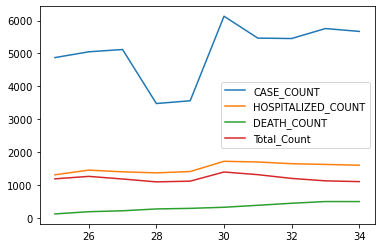

In [109]:
#March

march = data['DATE_OF_INTEREST'].between('03/25/2020 12:00:00 AM', '04/03/2020 12:00:00 AM')
data[march].plot()

<AxesSubplot:>

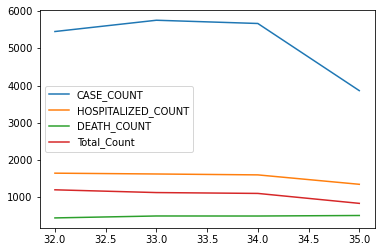

In [108]:
#April

april = data['DATE_OF_INTEREST'].between('04/01/2020 12:00:00 AM', '04/04/2020 12:00:00 AM')
data[april].plot()

<AxesSubplot:>

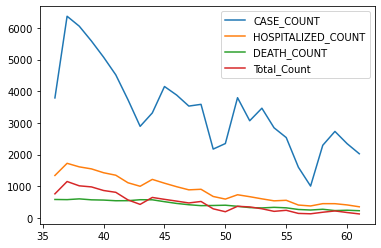

In [110]:
#May

may = data['DATE_OF_INTEREST'].between('04/05/2020 12:00:00 AM', '04/30/2020 12:00:00 AM')

data[may].plot()

<AxesSubplot:>

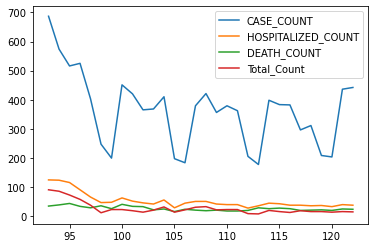

In [114]:
#june

june = data['DATE_OF_INTEREST'].between('06/01/2020 12:00:00 AM', '06/30/2020 12:00:00 AM')

data[june].plot()

<AxesSubplot:>

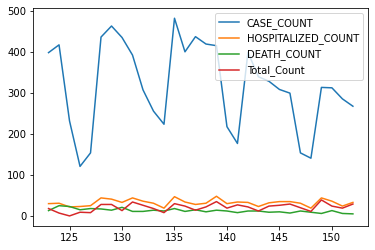

In [113]:
#july

july = data['DATE_OF_INTEREST'].between('07/01/2020 12:00:00 AM', '07/30/2020 12:00:00 AM')

data[july].plot()

<AxesSubplot:>

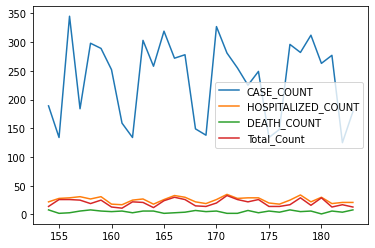

In [116]:
#Augost

Aug = data['DATE_OF_INTEREST'].between('08/01/2020 12:00:00 AM', '08/30/2020 12:00:00 AM')

data[Aug].plot()

<AxesSubplot:>

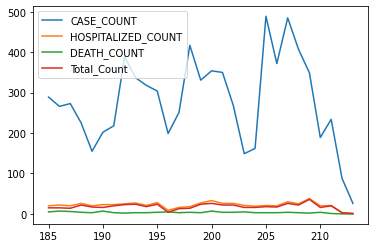

In [117]:
#Septemper

sep = data['DATE_OF_INTEREST'].between('09/01/2020 12:00:00 AM', '09/30/2020 12:00:00 AM')

data[sep].plot()

# Relationship about varibles



In [127]:
np.corrcoef(data['CASE_COUNT'] , data['HOSPITALIZED_COUNT'])

array([[1.        , 0.97264481],
       [0.97264481, 1.        ]])

In [120]:
np.corrcoef(data['CASE_COUNT'] , data['DEATH_COUNT'])

array([[1.     , 0.84612],
       [0.84612, 1.     ]])

In [126]:
np.corrcoef(data['HOSPITALIZED_COUNT'] , data['DEATH_COUNT'])

array([[1.        , 0.87148841],
       [0.87148841, 1.        ]])

In [125]:
np.corrcoef(data['DEATH_COUNT'] , data['Total_Count'])

array([[1.        , 0.72879474],
       [0.72879474, 1.        ]])